# Problem Statement

    The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam. 
    
 	The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text. 
    
    This corpus has been collected from free or free for research sources at the Internet: 
    
    A collection of 5573 rows SMS spam messages was manually extracted from the   Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages.  
    
    A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. 
    
    The main goal of these two parts of article is to show how you could design a spam filtering system from scratch.

# Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import chardet
with open(r"C:\Users\Swati\OneDrive\Desktop\DataScience\Projects\Email Spam detection project\spam.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

# Loading the dataset

In [3]:
# dataset loading
spam_df = pd.read_csv(r"C:\Users\Swati\OneDrive\Desktop\DataScience\Projects\Email Spam detection project\spam.csv",encoding='ISO-8859-1')
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Cleaning

In [4]:
# lets check for shape of dataset
spam_df.shape

(5572, 5)

In [5]:
# checking for some more information about dataset
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Since, the columns 'Unnamed: 2','Unnamed: 3','Unnamed: 4' have more than 90% missing values we will drop them.

In [6]:
#dropping unnecessary columns
spam_df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)
spam_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Renaming columns

We will just rename the columns for our convenience.
Since the column v1 represents the label that either the email is spam or ham we will rename it as 'class_label' and the column v2 shows the full text of message we will rename it as 'message'.

In [7]:
spam_df.rename(columns={'v1':'class_label','v2':'message'}, inplace=True)
spam_df.tail()

,class_label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


The column class_label is our target variable and it is is in categorical form. So we will use the label encoder to convert it into numeric form.

In [8]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
# label encoding for categorical feature
spam_df['class_label'] = encoder.fit_transform(spam_df['class_label'])
spam_df.sample(10)

,class_label,message
322,0,cud u tell ppl im gona b a bit l8 cos 2 buses ...
3309,0,Oh ho. Is this the first time u use these type...
2121,0,In xam hall boy asked girl Tell me the startin...
3685,0,I get out of class in bsn in like &lt;#&gt; ...
4985,0,That's y u haf 2 keep me busy...
4426,0,So what did the bank say about the money?
3295,0,Hi there. We have now moved in2 our pub . Woul...
4724,0,There'll be a minor shindig at my place later ...
1121,1,Do you want 750 anytime any network mins 150 t...
5496,0,Yes... I trust u to buy new stuff ASAP so I ca...


# Checking for null values

In [10]:
# Let's check for null values
spam_df.isnull().sum().sum()

0

Our dataset contains no null values

# Checking for Duplicate entries

In [11]:
#Let's check for duplicate entries
spam_df.duplicated().sum()

403

There are 403 duplicate entries in our dataset. So we will drop these duplicates by keeping first.

In [12]:
# removing duplicates
spam_df = spam_df.drop_duplicates(keep = 'first')


In [13]:
# let's check once again for duplicate entries
spam_df.duplicated().sum()

0

# EDA

In [14]:
# let's check for value counts of 'class_label'
spam_df['class_label'].value_counts()

0    4516
1     653
Name: class_label, dtype: int64

there are 4516 ham messages and 653 spam messages which means that our dataset is highly imbalanced

# Data Visualization

In [15]:
# lets import necessary libraries for plotting 
import matplotlib.pyplot as plt
import seaborn as sns

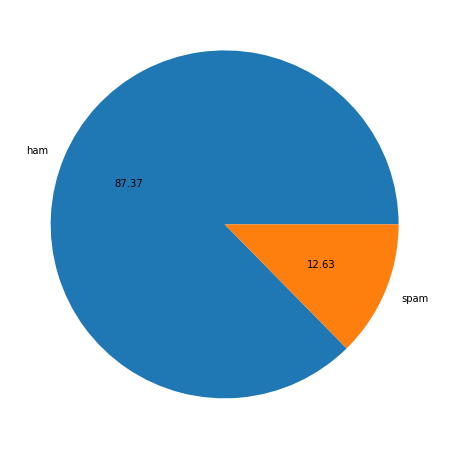

In [16]:
# plotting a pie chart for class_label feature
plt.figure(figsize=(15,8))
plt.pie(spam_df['class_label'].value_counts(),labels=['ham','spam'],autopct="%.2f")
plt.show()

The above piechart shows that 87.37% messages are ham and 12.63% messages are spam

# Data Pre-processing

In [17]:
#lets install nltk for further data processing
!pip install nltk

In [18]:
!pip install --upgrade nltk

In [19]:
# import nltk
import nltk

# Feature Extraction

In [20]:
# checking for length of each message by applying len function
spam_df['msg_length'] = spam_df['message'].apply(len)
spam_df['num_words'] = spam_df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
spam_df['num_sent'] = spam_df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
spam_df.head()

,class_label,message,msg_length,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


lets check overall statistics of the 3 newly extracted features

In [22]:
#descriptive statistics for overall dataset
spam_df[['msg_length','num_words','num_sent']].describe()

,msg_length,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


for overall dataset
the maximum length of message is 910 and minimum is 2.
the maximum number of words is 220 and minimum number of words is 1.
the maximum number of sentences is 38 and minimum is 1.

In [23]:
# check for descriptive statistics for ham 
spam_df[spam_df['class_label']==0][['msg_length','num_words','num_sent']].describe()

,msg_length,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


for ham messages 
the maximum length of message is 910 and minimum is 2.
the maximum number of words is 220 and minimum number of words is 1.
the maximum number of sentences is 38 and minimum is 1.

In [24]:
# check for descriptive statistics for spam
spam_df[spam_df['class_label']==1][['msg_length','num_words','num_sent']].describe()

,msg_length,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


for spam messages 
the maximum length of message is 224 and minimum is 13.
the maximum number of words is 46 and minimum number of words is 2.
the maximum number of sentences is 9 and minimum is 1.

# Visualization of new features

In [25]:
# import seaborn to plot histogram
import seaborn as sns

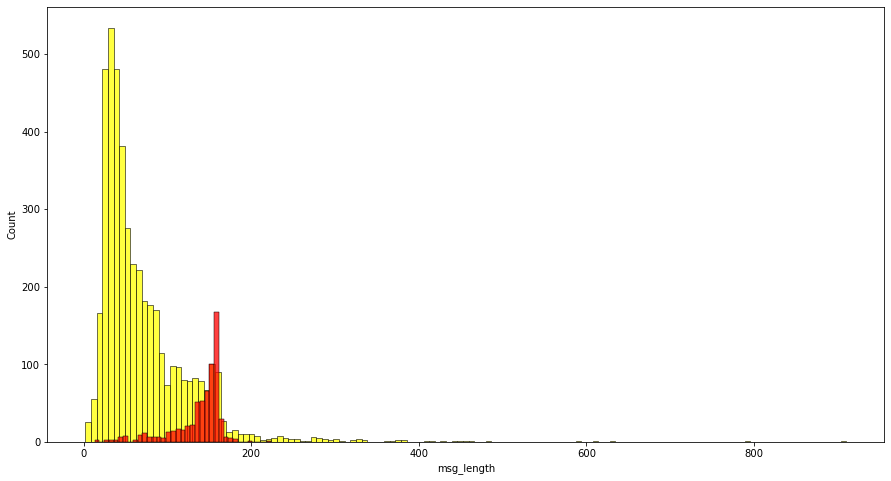

In [26]:
# plotting a histogram for msg_length of spam and ham
plt.figure(figsize=(15,8))
sns.histplot(spam_df[spam_df['class_label']==0]['msg_length'],color='yellow')
sns.histplot(spam_df[spam_df['class_label']==1]['msg_length'],color='red')
plt.show()

We can see clearly see that length of messages is maximum for ham messages and minimum for spam messages.

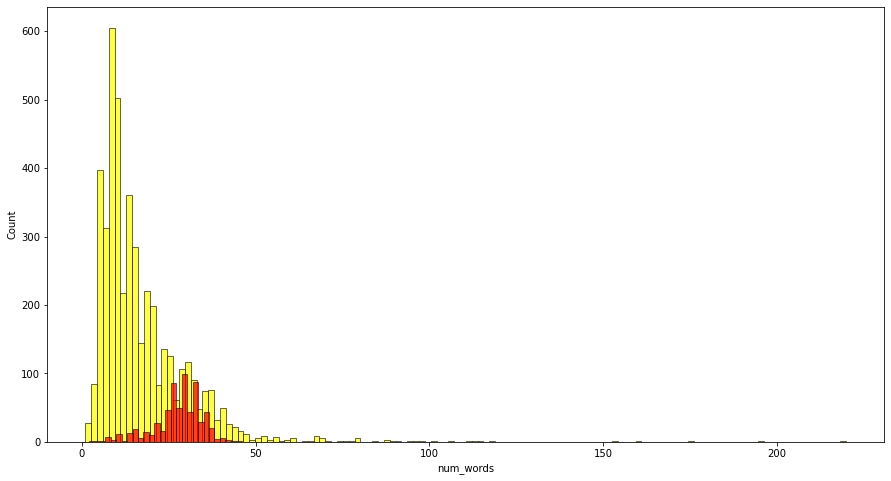

In [27]:
# plotting histogram for num_words in spam and ham
plt.figure(figsize=(15,8))
sns.histplot(spam_df[spam_df['class_label']==0]['num_words'],color='yellow')
sns.histplot(spam_df[spam_df['class_label']==1]['num_words'],color='red')
plt.show()

The above histogram shows that the number of words are maximum for ham messages and minimum for spam messages.

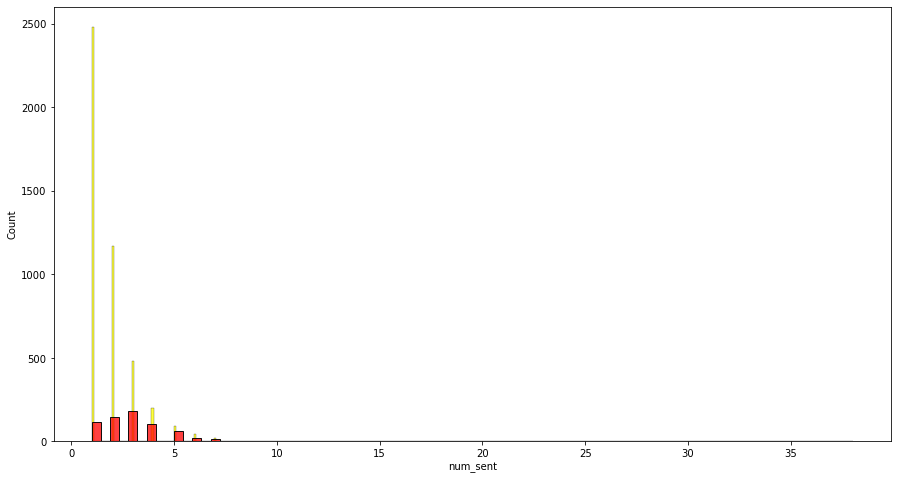

In [28]:
# plotting a histogram for num_sent in spam and ham
plt.figure(figsize=(15,8))
sns.histplot(spam_df[spam_df['class_label']==0]['num_sent'],color='yellow')
sns.histplot(spam_df[spam_df['class_label']==1]['num_sent'],color='red')
plt.show()

The number of sentences are more for ham messages and less for spam messages

# Correlation

In [29]:
#lets check for correlation of dataset
spam_df.corr()

,class_label,msg_length,num_words,num_sent
class_label,1.000000,0.384717,0.262912,0.263939
msg_length,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sent,0.263939,0.624139,0.679971,1.000000


<AxesSubplot:>

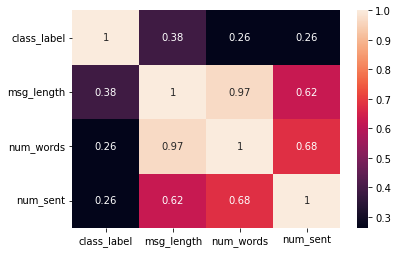

In [30]:
# let's plot a heatmap for the correlation function
sns.heatmap(spam_df.corr(),annot=True)

the above heatmap shows that there is multicollinearity present in our dataset.
the features 'num_words' and 'msg_length' are highly correlated with each other.


lets use the following techniques for further data analysis
tokenization : it breaks out the message into words.
stemming : it reduces a word to its dictionary root 
e.g. for the words send, sent, sending it considers the only word send which is the main dictionary root of these 3 words
stopwords removal 

In [32]:
#importing some necessary libraries
from nltk.corpus import stopwords
stopwords.words('english')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


lets define a function which will perform the above mentioned operations on our dataset and return us cleaned text data

In [34]:
# let's define a function to get a transformed text
def transform_text(message):
    # convert all textx into lower case
    message=message.lower()
    # tokenization
    message = nltk.word_tokenize(message)
    
    #let's create an empty list x
    x = []
    for i in message:
        if i.isalnum():
            x.append(i)
    y = [] 
    # removing stopwords
    for j in x:
        if j not in stopwords.words('english') and j not in string.punctuation:
            y.append(j)
    z = []
    for k in y:
        z.append(ps.stem(k))
        
    return " ".join(z)

In [35]:
# select a row randomly 
spam_df['message'][1500]

'Host-based IDPS for linux systems.'

In [36]:
# apply the transformation function defined above
transform_text('Host-based IDPS for linux systems.')

'idp linux system'

In [37]:
# create new column transformed_msg  
spam_df['transformed_msg'] = spam_df['message'].apply(transform_text)

In [38]:
spam_df.head()

,class_label,message,msg_length,num_words,num_sent,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Wordcloud

the wordcloud gives us an idea about the words which are most repetative in the spam or ham.

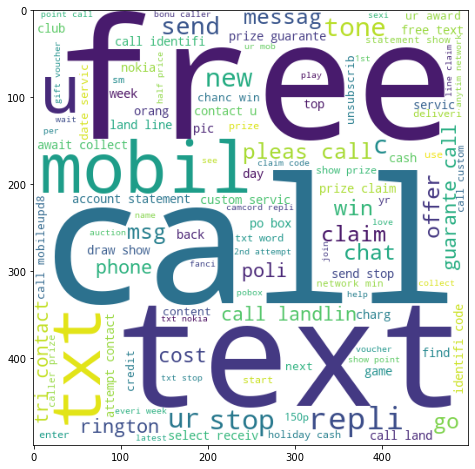

In [39]:
# create wordcloud for spam 
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
plt.figure(figsize=(12,8))
spam_wc = wc.generate(spam_df[spam_df['class_label']==1]['transformed_msg'].str.cat(sep = ''))
plt.imshow(spam_wc)

the words 'call','free','new','mobil','text','txt','offer','repli','claim','stop' etc are the most common words in spam class.

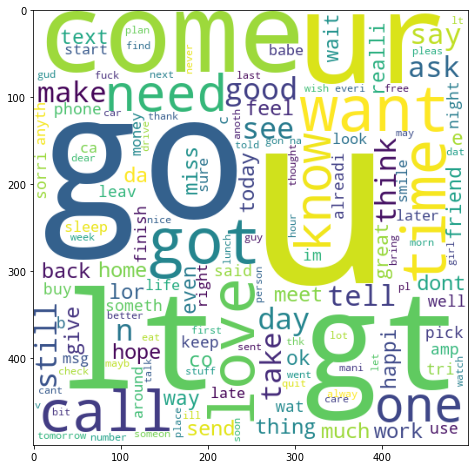

In [40]:
# lets create wordcloud for ham
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
plt.figure(figsize=(12,8))
ham_wc = wc.generate(spam_df[spam_df['class_label']==0]['transformed_msg'].str.cat(sep = ''))
plt.imshow(ham_wc)

the words 'u','ur','come','go','got','want','day','time','need','know' etc are most common words in ham messages.

In [41]:
# most common 50 words in spam messages
spam_corpus = []   

for msg in spam_df[spam_df['class_label']==1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [42]:
len(spam_corpus)

9939

In [43]:
from collections import Counter
Counter(spam_corpus).most_common(50)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35),
 ('show', 33),
 ('today', 33),
 ('offer', 33),
 ('line', 33),
 ('go', 32),
 ('receiv', 31),
 ('want', 31),
 ('latest', 30),
 ('rington', 30),
 ('landlin', 30)]

In [44]:
#lets make a dataframe for most common words of spam messages to show them with their frequencies
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


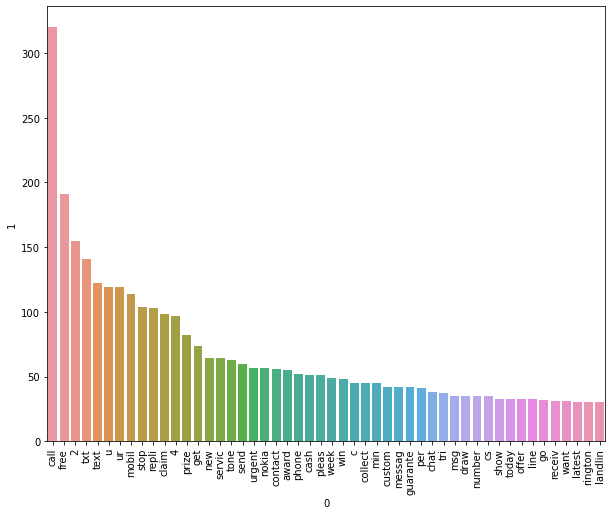

In [45]:
#barplot for frequency of most common 50 words in spam 
plt.figure(figsize=(10,8))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(50))[0],pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation = 'vertical')
plt.show()

the word which occurs maximum time in spam messages is 'call'.

In [46]:
# most common 50 words in ham messages
ham_corpus = []   

for msg in spam_df[spam_df['class_label']==0]['transformed_msg'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [47]:
len(ham_corpus)

35404

In [48]:
from collections import Counter
Counter(spam_corpus).most_common(50)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35),
 ('show', 33),
 ('today', 33),
 ('offer', 33),
 ('line', 33),
 ('go', 32),
 ('receiv', 31),
 ('want', 31),
 ('latest', 30),
 ('rington', 30),
 ('landlin', 30)]

In [49]:
#lets make a dataframe for most common words of ham messages to show them with their frequencies

pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


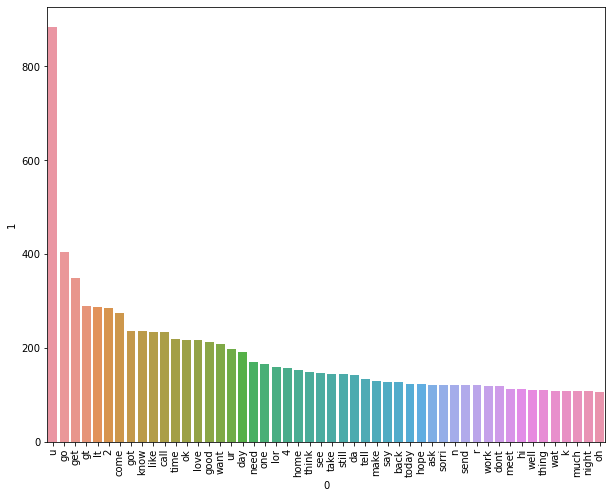

In [50]:
#barplot for frequency of most common 50 words in ham 

plt.figure(figsize=(10,8))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(50))[0],pd.DataFrame(Counter(ham_corpus).most_common(50))[1])
plt.xticks(rotation = 'vertical')
plt.show()

the word which occurs maximum time in spam messages is 'u'.

# Model Building

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [52]:
#lets apply tfidf vectorizer to transformed_msg and convert it to array
X = tfidf.fit_transform(spam_df['transformed_msg']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
#check for shape of array
X.shape

(5169, 6708)

In [54]:
#define target variable y
y = spam_df['class_label'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [55]:
#check for shape of target variable
y.shape

(5169,)

In [56]:
#divide dataset into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 30)

In [57]:
#import Naive-Bayes algorithms
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,classification_report
from sklearn.model_selection import cross_val_score

# GaussianNB

In [59]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,y_pred_gnb))
print("Confusion Matrix : \n", confusion_matrix(y_test,y_pred_gnb))
print("PrecisionScore : ",precision_score(y_test,y_pred_gnb))
print("CV Score : ", cross_val_score(gnb, X, y, cv =5, scoring='precision').mean())

Accuracy Score :  0.8638824439288476
Confusion Matrix : 
 [[969 144]
 [ 32 148]]
PrecisionScore :  0.5068493150684932
CV Score :  0.485075542851163


# MultinomialNB

In [60]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred_mnb = mnb.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,y_pred_mnb))
print("Confusion Matrix :  \n", confusion_matrix(y_test,y_pred_mnb))
print("PrecisionScore : ",precision_score(y_test,y_pred_mnb))
print("CV Score : ", cross_val_score(mnb, X, y, cv =5, scoring='precision').mean())

Accuracy Score :  0.9489559164733179
Confusion Matrix :  
 [[1113    0]
 [  66  114]]
PrecisionScore :  1.0
CV Score :  1.0


# BernoulliNB

In [61]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
y_pred_bnb = bnb.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,y_pred_bnb))
print("Confusion Matrix :  \n", confusion_matrix(y_test,y_pred_bnb))
print("PrecisionScore : ",precision_score(y_test,y_pred_bnb))
print("CV Score : ", cross_val_score(bnb, X, y, cv =5, scoring='precision').mean())

Accuracy Score :  0.9667440061871616
Confusion Matrix :  
 [[1109    4]
 [  39  141]]
PrecisionScore :  0.9724137931034482
CV Score :  0.9640677292417175


Since, out of the 3 NB algorithms the MultinomialNB gives best precision score with great accuracy. Hence we will select this one.

# Let's check for some other algorithms

In [62]:
#import some other algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

In [63]:
#define the algorithms imported above
lr = LogisticRegression(solver='liblinear',penalty='l1')
knn = KNeighborsClassifier()
mnb = MultinomialNB()
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier(n_estimators=50,random_state=3)
adb = AdaBoostClassifier(n_estimators=50,random_state=3)
bg = BaggingClassifier(n_estimators=50,random_state=3)
gdb = GradientBoostingClassifier()
svc = SVC(kernel = 'sigmoid', gamma=1.0)
xgb = XGBClassifier(n_estimators=50,random_state=3)

In [67]:
#lets make a dictionary containing all the algorithms names
clfs = {
    'LR':lr,
    'KNN':knn,
    'MNB':mnb,
    'DT':dt,
    'RF':rf,
    'ADB':adb,
    'BG':bg,
    'GDB':gdb,
    'SVC':svc,
    'XGB':xgb
}

In [83]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_predict_clf = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_predict_clf)
    precision = precision_score(y_test,y_predict_clf)
    class_report = classification_report(y_test, y_predict_clf)
    CVscore = cross_val_score(clf, X, y, cv =5, scoring='precision').mean()
    
    return accuracy,precision,class_report,CVscore

In [84]:
accuracy_scores = []
precision_scores = []
classification_reports = []
CV_scores = []

for name, clf in clfs.items():
    current_accuracy,current_precision,current_class_report,current_CVscore= train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print("for ",name)
    print("Accurtacy : ",current_accuracy)
    print("Precision : ",current_precision)
    print("Classification Report : \n",current_class_report)
    print("CV Score : ",current_CVscore)
    print("*"*70,sep='')
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    classification_reports.append(current_class_report)
    CV_scores.append(current_CVscore)

for  LR
Accurtacy :  0.945862335653519
Precision :  0.9365079365079365
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1113
           1       0.94      0.66      0.77       180

    accuracy                           0.95      1293
   macro avg       0.94      0.82      0.87      1293
weighted avg       0.95      0.95      0.94      1293

CV Score :  0.9302993992655886
**********************************************************************
for  KNN
Accurtacy :  0.8948182521268369
Precision :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      1113
           1       1.00      0.24      0.39       180

    accuracy                           0.89      1293
   macro avg       0.95      0.62      0.67      1293
weighted avg       0.91      0.89      0.87      1293

CV Score :  1.0
***********************************************

In [88]:
#create a dataframe of all algporithms with their accuracy and precision scores
result = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy Score':accuracy_scores,'Precision Score':precision_scores,'CV Score':CV_scores})
result

,Algorithm,Accuracy Score,Precision Score,CV Score
0,LR,0.945862,0.936508,0.930299
1,KNN,0.894818,1.000000,1.000000
2,MNB,0.948956,1.000000,1.000000
3,DT,0.928074,0.822222,0.817915
4,RF,0.962877,1.000000,0.989473
5,ADB,0.955143,0.917808,0.920298
6,BG,0.955143,0.858824,0.863729
7,GDB,0.953596,0.928571,0.947339
8,SVC,0.965197,0.953020,0.963835
9,XGB,0.962104,0.939597,0.957739


Since our dataset is imbalanced we will give more preference to the precision score and will select the algorithm with highest precision score.
lets arrange the above result in descending order of precision score to get the the algorithms with highest precision score on top.

In [89]:
# set the above result in descending order
result = result.sort_values('Precision Score',ascending=False)
result

,Algorithm,Accuracy Score,Precision Score,CV Score
1,KNN,0.894818,1.000000,1.000000
2,MNB,0.948956,1.000000,1.000000
4,RF,0.962877,1.000000,0.989473
8,SVC,0.965197,0.953020,0.963835
9,XGB,0.962104,0.939597,0.957739
0,LR,0.945862,0.936508,0.930299
7,GDB,0.953596,0.928571,0.947339
5,ADB,0.955143,0.917808,0.920298
6,BG,0.955143,0.858824,0.863729
3,DT,0.928074,0.822222,0.817915


Now we can see that there are 3 algorithms giving best precision score as 1 with good accuracy scores.
Out of them we will select the Multinomial NB as our final algorithm which gives us precision score 1 and accuracy score 0.948956 with CV score 1.

# Model Saving

In [106]:
#saving a model
import pickle
pickle.dump(tfidf,open('spam_vectorizer.pkl','wb'))
pickle.dump(mnb,open('spam_classification_model.pkl','wb'))

In [107]:
# Prediction
prediction = mnb.predict(x_test)

In [108]:
Actual = np.array(y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head(10)

,Predicted Values,Actual Values
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
